<a href="https://colab.research.google.com/github/Kusanagi242/BTVN/blob/main/BTVN_TGM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls gdrive/MyDrive/DATA/Birds

train.zip


In [3]:
!unzip gdrive/MyDrive/DATA/Birds/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/118.House_Sparrow/House_Sparrow_0052_112252.jpg  
  inflating: train/118.House_Sparrow/House_Sparrow_0053_111388.jpg  
  inflating: train/118.House_Sparrow/House_Sparrow_0055_111393.jpg  
  inflating: train/118.House_Sparrow/House_Sparrow_0059_111164.jpg  
  inflating: train/118.House_Sparrow/House_Sparrow_0061_112795.jpg  
  inflating: train/118.House_Sparrow/House_Sparrow_0063_111460.jpg  
  inflating: train/118.House_Sparrow/House_Sparrow_0067_112913.jpg  
  inflating: train/118.House_Sparrow/House_Sparrow_0068_113247.jpg  
  inflating: train/118.House_Sparrow/House_Sparrow_0073_112745.jpg  
  inflating: train/118.House_Sparrow/House_Sparrow_0074_111997.jpg  
  inflating: train/118.House_Sparrow/House_Sparrow_0079_113288.jpg  
  inflating: train/118.House_Sparrow/House_Sparrow_0080_111099.jpg  
  inflating: train/118.House_Sparrow/House_Sparrow_0082_112478.jpg  
  inflating: train/118.House_Sparrow/House_Sparrow_0

In [4]:
!ls train/

001.Black_footed_Albatross     101.White_Pelican
002.Laysan_Albatross	       102.Western_Wood_Pewee
003.Sooty_Albatross	       103.Sayornis
004.Groove_billed_Ani	       104.American_Pipit
005.Crested_Auklet	       105.Whip_poor_Will
006.Least_Auklet	       106.Horned_Puffin
007.Parakeet_Auklet	       107.Common_Raven
008.Rhinoceros_Auklet	       108.White_necked_Raven
009.Brewer_Blackbird	       109.American_Redstart
010.Red_winged_Blackbird       110.Geococcyx
011.Rusty_Blackbird	       111.Loggerhead_Shrike
012.Yellow_headed_Blackbird    112.Great_Grey_Shrike
013.Bobolink		       113.Baird_Sparrow
014.Indigo_Bunting	       114.Black_throated_Sparrow
015.Lazuli_Bunting	       115.Brewer_Sparrow
016.Painted_Bunting	       116.Chipping_Sparrow
017.Cardinal		       117.Clay_colored_Sparrow
018.Spotted_Catbird	       118.House_Sparrow
019.Gray_Catbird	       119.Field_Sparrow
020.Yellow_breasted_Chat       120.Fox_Sparrow
021.Eastern_Towhee	       121.Grasshopper_Sparrow
022.Chuck_will_Wi

In [5]:
# kiểm tra số ảnh đầu vào
from pathlib import Path 
train_root = Path('train/')
print(len(list(train_root.glob("*/*"))))

11788


In [6]:
!ls train/001.Black_footed_Albatross | wc -l

60


In [7]:
import tensorflow as tf

# Build input pipeline with keras:
batch_size = 35
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_root,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size,
)


Found 11788 files belonging to 200 classes.
Using 9431 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_root,
    validation_split = 0.2,
    subset="validation",
    seed = 123,
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 11788 files belonging to 200 classes.
Using 2357 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['001.Black_footed_Albatross', '002.Laysan_Albatross', '003.Sooty_Albatross', '004.Groove_billed_Ani', '005.Crested_Auklet', '006.Least_Auklet', '007.Parakeet_Auklet', '008.Rhinoceros_Auklet', '009.Brewer_Blackbird', '010.Red_winged_Blackbird', '011.Rusty_Blackbird', '012.Yellow_headed_Blackbird', '013.Bobolink', '014.Indigo_Bunting', '015.Lazuli_Bunting', '016.Painted_Bunting', '017.Cardinal', '018.Spotted_Catbird', '019.Gray_Catbird', '020.Yellow_breasted_Chat', '021.Eastern_Towhee', '022.Chuck_will_Widow', '023.Brandt_Cormorant', '024.Red_faced_Cormorant', '025.Pelagic_Cormorant', '026.Bronzed_Cowbird', '027.Shiny_Cowbird', '028.Brown_Creeper', '029.American_Crow', '030.Fish_Crow', '031.Black_billed_Cuckoo', '032.Mangrove_Cuckoo', '033.Yellow_billed_Cuckoo', '034.Gray_crowned_Rosy_Finch', '035.Purple_Finch', '036.Northern_Flicker', '037.Acadian_Flycatcher', '038.Great_Crested_Flycatcher', '039.Least_Flycatcher', '040.Olive_sided_Flycatcher', '041.Scissor_tailed_Flycatcher', '042.Ver

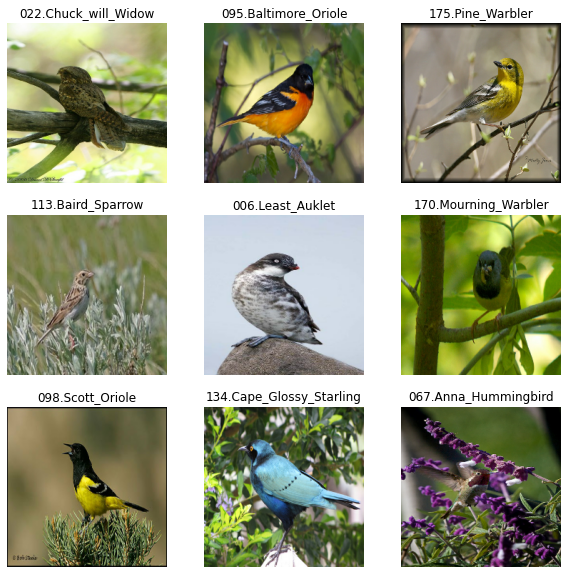

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
print(train_ds)

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


In [12]:
filelist_ds = tf.data.Dataset.list_files(str(train_root/'*/*'))
for file in filelist_ds.take(9):
  print(file)

tf.Tensor(b'train/040.Olive_sided_Flycatcher/Olive_Sided_Flycatcher_0072_796877.jpg', shape=(), dtype=string)
tf.Tensor(b'train/010.Red_winged_Blackbird/Red_Winged_Blackbird_0028_4709.jpg', shape=(), dtype=string)
tf.Tensor(b'train/077.Tropical_Kingbird/Tropical_Kingbird_0102_69654.jpg', shape=(), dtype=string)
tf.Tensor(b'train/095.Baltimore_Oriole/Baltimore_Oriole_0016_89885.jpg', shape=(), dtype=string)
tf.Tensor(b'train/180.Wilson_Warbler/Wilson_Warbler_0109_175578.jpg', shape=(), dtype=string)
tf.Tensor(b'train/192.Downy_Woodpecker/Downy_Woodpecker_0131_184446.jpg', shape=(), dtype=string)
tf.Tensor(b'train/038.Great_Crested_Flycatcher/Great_Crested_Flycatcher_0105_29456.jpg', shape=(), dtype=string)
tf.Tensor(b'train/062.Herring_Gull/Herring_Gull_0084_46406.jpg', shape=(), dtype=string)
tf.Tensor(b'train/107.Common_Raven/Common_Raven_0029_102039.jpg', shape=(), dtype=string)


In [13]:
import tensorflow as tf
import numpy as np
import re
def get_label(file_path):
  print(file_path)
  parts = tf.strings.split(file_path,'/')
  labels = np.zeros(200,dtype=int)
  labels[int(re.search(r'\d+', parts[-2].numpy().decode('utf-8')).group())-1]=1
  labels = labels.tolist()
  return tf.convert_to_tensor(labels)

for file in filelist_ds.take(9):
  print('filename: ', file.numpy().decode('utf-8'))
  print('label: ', get_label(file).numpy())

filename:  train/041.Scissor_tailed_Flycatcher/Scissor_Tailed_Flycatcher_0118_42067.jpg
tf.Tensor(b'train/041.Scissor_tailed_Flycatcher/Scissor_Tailed_Flycatcher_0118_42067.jpg', shape=(), dtype=string)
label:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
filename:  train/015.Lazuli_Bunting/Lazuli_Bunting_0034_14864.jpg
tf.Tensor(b'train/015.Lazuli_Bunting/Lazuli_Bunting_0034_14864.jpg', shape=(), dtype=string)
label:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

# Create Model

In [14]:
from tensorflow.keras import layers
# Alex net
model = tf.keras.Sequential()
# 1st Convolutional Layer
model.add(layers.Conv2D(filters = 96, input_shape = (224, 224, 3), kernel_size = (11, 11), strides = (4, 4), padding = 'valid'))
model.add(layers.Activation('relu'))
# Max-Pooling 
model.add(layers.MaxPooling2D(pool_size = (2, 2),strides = (2, 2), padding = 'valid'))
# Batch Normalisation
model.add(layers.BatchNormalization())
  
# 2nd Convolutional Layer
model.add(layers.Conv2D(filters = 256, kernel_size = (11, 11), strides = (1, 1), padding = 'valid'))
model.add(layers.Activation('relu'))
# Max-Pooling
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
# Batch Normalisation
model.add(layers.BatchNormalization())
  
# 3rd Convolutional Layer
model.add(layers.Conv2D(filters = 384, kernel_size = (3, 3), strides = (1, 1), padding = 'valid'))
model.add(layers.Activation('relu'))
# Batch Normalisation
model.add(layers.BatchNormalization())
# 4th Convolutional Layer
model.add(layers.Conv2D(filters = 384, kernel_size = (3, 3), strides = (1, 1), padding = 'valid'))
model.add(layers.Activation('relu'))
# Batch Normalisation
model.add(layers.BatchNormalization())
# 5th Convolutional Layer
model.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = 'valid'))
model.add(layers.Activation('relu'))
# Max-Pooling
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
# Batch Normalisation
model.add(layers.BatchNormalization())
# Flattening
model.add(layers.Flatten())
# 1st Dense Layer
model.add(layers.Dense(4096, input_shape = (224*224*3, )))
model.add(layers.Activation('relu'))
# Add Dropout to prevent overfitting
model.add(layers.Dropout(0.4))
# Batch Normalisation
model.add(layers.BatchNormalization())
# 2nd Dense Layer
model.add(layers.Dense(4096))
model.add(layers.Activation('relu'))
# Add Dropout
model.add(layers.Dropout(0.4))
# Batch Normalisation
model.add(layers.BatchNormalization())
# Output Softmax Layer
# model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)       0

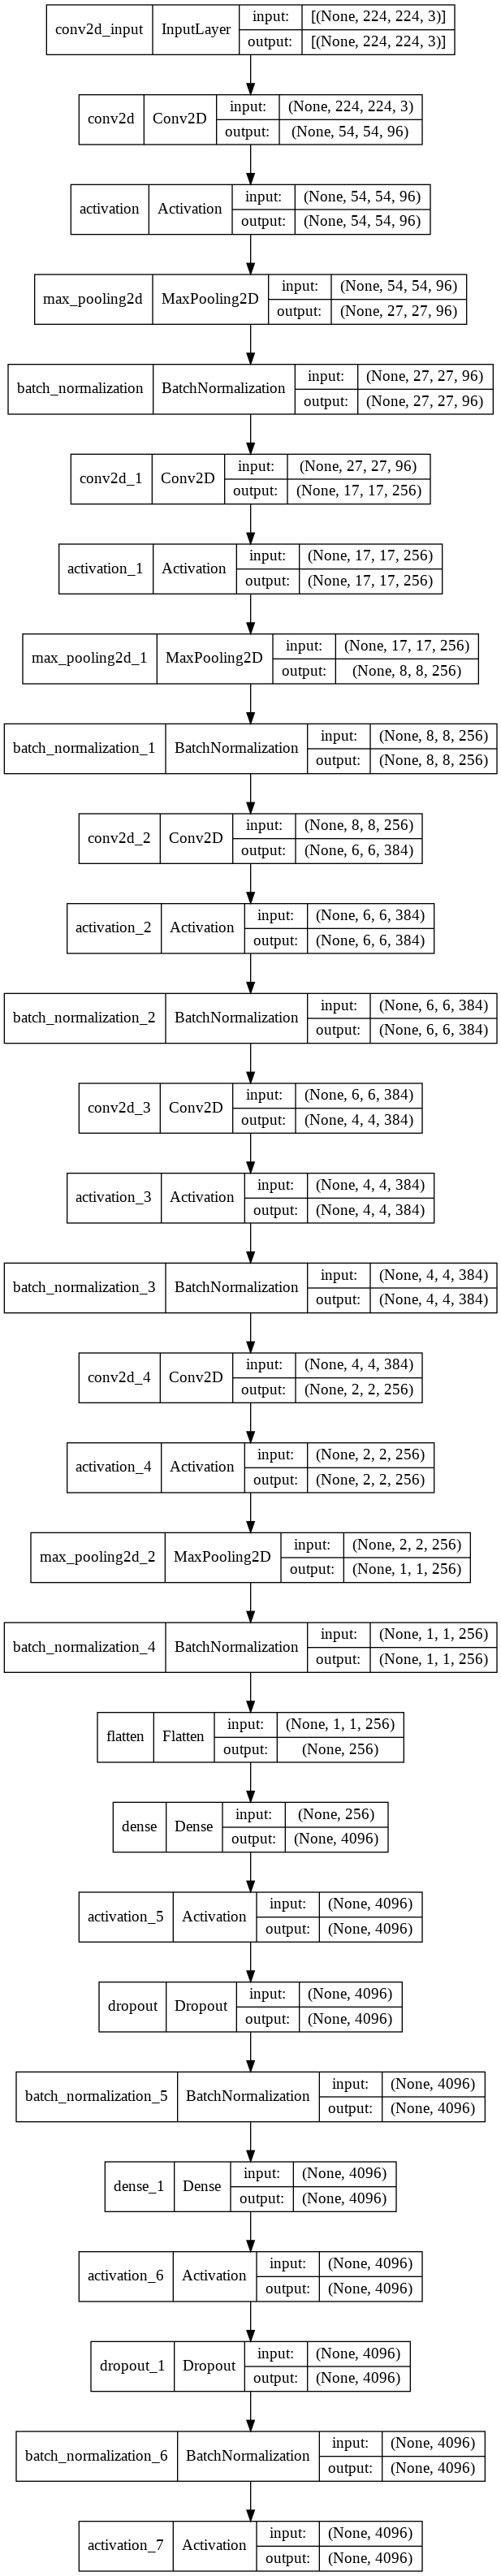

In [16]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes = True)

# Compile model

In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

# Train

In [18]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

In [19]:
history = model.fit(train_ds,epochs=100,callbacks=[callbacks] )

Epoch 1/100
270/270 [==============================] - 45s 120ms/step - loss: 8.3052 - accuracy: 0.0060
Epoch 2/100
270/270 [==============================] - 31s 114ms/step - loss: 7.4773 - accuracy: 0.0161
Epoch 3/100
270/270 [==============================] - 32s 114ms/step - loss: 6.9884 - accuracy: 0.0235
Epoch 4/100
270/270 [==============================] - 32s 115ms/step - loss: 6.5952 - accuracy: 0.0315
Epoch 5/100
270/270 [==============================] - 32s 114ms/step - loss: 6.2625 - accuracy: 0.0331
Epoch 6/100
270/270 [==============================] - 31s 114ms/step - loss: 6.0319 - accuracy: 0.0387
Epoch 7/100
270/270 [==============================] - 31s 114ms/step - loss: 5.8041 - accuracy: 0.0469
Epoch 8/100
270/270 [==============================] - 32s 115ms/step - loss: 5.6047 - accuracy: 0.0522
Epoch 9/100
270/270 [==============================] - 32s 116ms/step - loss: 5.4586 - accuracy: 0.0581
Epoch 10/100
270/270 [==============================] - 32s 116m

# Save model

In [21]:
model.save('gdrive/MyDrive/DATA/Birds/Trained.hdf5')